In [2]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [3]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/kaggle/input/dogs-vs-cats/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [4]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [5]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [7]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [8]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 100ms/step - loss: 1.4731 - accuracy: 0.5817 - val_loss: 0.7188 - val_accuracy: 0.6132
Epoch 2/10
625/625 [==============================] - 67s 106ms/step - loss: 0.6092 - accuracy: 0.6736 - val_loss: 0.6155 - val_accuracy: 0.6786
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5133 - accuracy: 0.7431 - val_loss: 0.6201 - val_accuracy: 0.7236
Epoch 4/10
625/625 [==============================] - 63s 100ms/step - loss: 0.4586 - accuracy: 0.7860 - val_loss: 0.4353 - val_accuracy: 0.8004
Epoch 5/10
625/625 [==============================] - 64s 101ms/step - loss: 0.3937 - accuracy: 0.8183 - val_loss: 0.4234 - val_accuracy: 0.8078
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3338 - accuracy: 0.8539 - val_loss: 0.4663 - val_accuracy: 0.8024
Epoch 7/10
625/625 [==============================] - 63s 101ms/step - loss: 0.2674 - accuracy: 0.8845 - val_loss: 1.4963 - val_ac

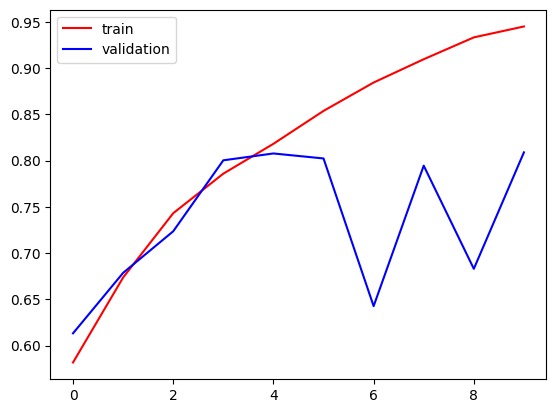

In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

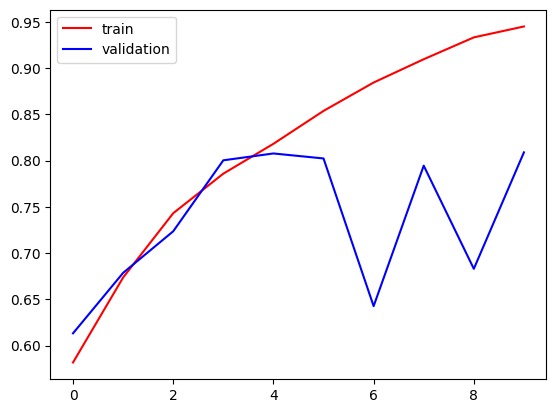

In [10]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

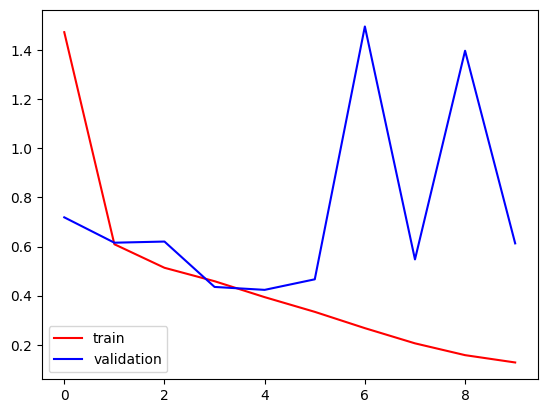

In [11]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

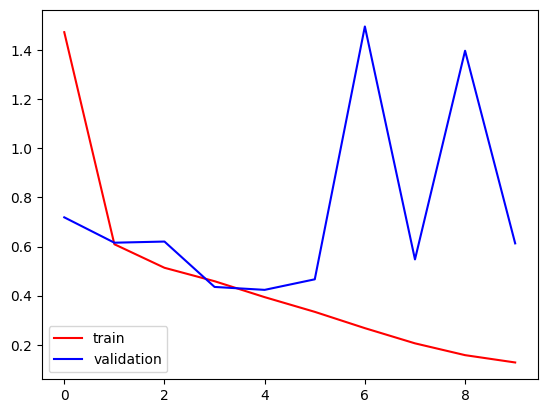

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# ways to reduce overfitting

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce complexity

In [13]:
import cv2

In [20]:
test_img_1 = cv2.imread('/kaggle/input/testing-data-images/Cat.jpg')
# test_img_2 = cv2.imread('/kaggle/input/testing-data-images/Dog.jpg')

In [21]:
# # code for displaying multiple images in one figure

# #import libraries
# import cv2
# from matplotlib import pyplot as plt

# # create figure
# fig = plt.figure(figsize=(10, 7))

# # setting values to rows and column variables
# rows = 2
# columns = 2

# # reading images
# Image1 = cv2.imread('/kaggle/input/testing-data-images/Cat.jpg')
# Image2 = cv2.imread('/kaggle/input/testing-data-images/Dog.jpg')


# # Adds a subplot at the 1st position
# fig.add_subplot(rows, columns, 1)

# # showing image
# plt.imshow(Image1)
# plt.axis('off')
# plt.title("First")

# # Adds a subplot at the 2nd position
# fig.add_subplot(rows, columns, 2)

# # showing image
# plt.imshow(Image2)
# plt.axis('off')
# plt.title("Second")

In [23]:
print(test_img_1.shape)
# print(test_img_2.shape)

(360, 540, 3)


In [24]:
Image1 = cv2.resize(test_img_1,(256,256))
# Image2 = cv2.resize(test_img_2,(256,256))

In [25]:
test_input_1 = Image1.reshape((1,256,256,3))
# test_input_2 = Image2.reshape((1,256,256,3))

In [26]:
# model.predict(test_input_2)
model.predict(test_input_1)

1/1 [==============================] - 0s 32ms/step


array([[0.]], dtype=float32)